# Analysis Section

In [1]:
# # ✓ Analysis correctly describes 3 observable trends ✓ Analysis provides sound reasoning to back up why all 3 trends are occurring.  

#  1. In general, cities that are closer to the equator are hotter. The maximum temperature of cities has a trend of decreasing as the distance from latitiude of 0 (the equator) increases. This is shown by the "Max Temperature vs. Latitude" scatterplot.
#  2. The humidity, cloudiness, and wind speed of cities do not have a discernible trend in relation to latitude. This is shown by the "Humidity vs. Latitude, "Cloudiness vs. Latitude," and "Wind Speed vs. Latitude" scatterplots.
#  3. The interferences in the 2 observances above also hold true if the data is divided betweeen the Southern Hemisphere and Northern Hemishpere. The r-squared values in the eight linear regression charts at the end of the notebook display support for this.

# Dependencies and Setup

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## This Generates the Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [4]:
# Print the city count to confirm sufficient count
len(cities)

619

In [5]:
# set up lists to hold reponse info
city_name = []
lat = []
lon = []
temp = []
humidity = []
cloud = []
wind = []
country = []
date = []
record_counter = 1

In [6]:
print(cities)

['chuy', 'ponta do sol', 'stornoway', 'atuona', 'langerwehe', 'hermanus', 'tapaua', 'albany', 'georgetown', 'lagoa', 'torbay', 'cape town', 'umzimvubu', 'yulara', 'kapaa', 'trenggalek', 'hithadhoo', 'ushuaia', 'axim', 'bluff', 'new norfolk', 'nizhneyansk', 'tsentoroy', 'puerto baquerizo moreno', 'fortuna', 'beyneu', 'hasaki', 'kaitangata', 'punta arenas', 'illoqqortoormiut', 'la primavera', 'tettnang', 'jamestown', 'rocha', 'butaritari', 'sao filipe', 'souillac', 'vaini', 'haines junction', 'severo-kurilsk', 'mataura', 'sahrak', 'broken hill', 'codrington', 'kavieng', 'busselton', 'lata', 'rikitea', 'cerro de pasco', 'barrow', 'tiksi', 'salinopolis', 'solovetskiy', 'lexington', 'nemuro', 'victoria', 'ballina', 'constitucion', 'sentyabrskiy', 'nouadhibou', 'baoqing', 'san cristobal', 'arraial do cabo', 'iqaluit', 'matamoros', 'puerto ayora', 'abhar', 'saint-raphael', 'sibu', 'kichera', 'bethel', 'the pas', 'saint-pierre', 'saint-leu', 'taolanaro', 'the valley', 'saldanha', 'abha', 'hovd

In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
url_before_city = f"{url}appid={weather_api_key}&units={units}&q="

In [8]:
# Log file print statement beginning
print(f"Beginning Data Retrieval")
print(f"-------------------------------------------")

# Iterative request for each city
# Perform a weather check on each city using a series of successive API calls.
# This loops through the list of cities and perform a request for data on each
for city in cities:
    # Build query URL
    query_url = f"{url_before_city}{city}"
        
    try:

        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_name.append(weather_json["name"])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp'])
        humidity.append(weather_json["main"]["humidity"])
        cloud.append(weather_json["clouds"]["all"])
        wind.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])

        # Include a print log of each city as it'sbeing processed (with the city number and city name).
        print(f"Processing Record {record_counter} | {city}")

        # Increase counter by one, but only if the record is found; otherwise, it does not count 
        record_counter+= 1

        # This waits for just over one second for running each loop because I read that this API might require that, I don't want to experiment too much since there are limits to how much I can run my API key
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

# Log file print statement ending
print(f"-------------------------------")
print(f"Data Retrieval Complete")

Beginning Data Retrieval
-------------------------------------------
Processing Record 1 | chuy
Processing Record 2 | ponta do sol
Processing Record 3 | stornoway
Processing Record 4 | atuona
Processing Record 5 | langerwehe
Processing Record 6 | hermanus
City not found. Skipping...
Processing Record 7 | albany
Processing Record 8 | georgetown
Processing Record 9 | lagoa
Processing Record 10 | torbay
Processing Record 11 | cape town
City not found. Skipping...
Processing Record 12 | yulara
Processing Record 13 | kapaa
Processing Record 14 | trenggalek
Processing Record 15 | hithadhoo
Processing Record 16 | ushuaia
Processing Record 17 | axim
Processing Record 18 | bluff
Processing Record 19 | new norfolk
City not found. Skipping...
Processing Record 20 | tsentoroy
Processing Record 21 | puerto baquerizo moreno
Processing Record 22 | fortuna
Processing Record 23 | beyneu
Processing Record 24 | hasaki
Processing Record 25 | kaitangata
Processing Record 26 | punta arenas
City not found. S

Processing Record 226 | naze
Processing Record 227 | providencia
Processing Record 228 | pacifica
Processing Record 229 | kosterevo
Processing Record 230 | cayenne
Processing Record 231 | east wenatchee bench
Processing Record 232 | marsh harbour
Processing Record 233 | tura
Processing Record 234 | kudahuvadhoo
Processing Record 235 | lompoc
Processing Record 236 | korla
Processing Record 237 | port jervis
Processing Record 238 | geraldton
Processing Record 239 | voskresenskoye
Processing Record 240 | lazaro cardenas
Processing Record 241 | cidreira
Processing Record 242 | alofi
Processing Record 243 | klaksvik
Processing Record 244 | young
Processing Record 245 | husavik
Processing Record 246 | gornyy
Processing Record 247 | aripuana
Processing Record 248 | dunedin
Processing Record 249 | bambous virieux
Processing Record 250 | saint-paul
City not found. Skipping...
Processing Record 251 | esna
City not found. Skipping...
City not found. Skipping...
Processing Record 252 | ciudad boli

Processing Record 461 | mehamn
Processing Record 462 | prince rupert
Processing Record 463 | ulladulla
Processing Record 464 | tarauaca
Processing Record 465 | ishigaki
Processing Record 466 | faanui
Processing Record 467 | brigantine
Processing Record 468 | kendari
Processing Record 469 | vila franca do campo
Processing Record 470 | mataram
Processing Record 471 | bedford
Processing Record 472 | soto la marina
Processing Record 473 | truro
Processing Record 474 | bucerias
Processing Record 475 | butembo
Processing Record 476 | la asuncion
Processing Record 477 | praia da vitoria
Processing Record 478 | gorontalo
Processing Record 479 | mopipi
Processing Record 480 | belmonte
Processing Record 481 | salumbar
Processing Record 482 | grand gaube
Processing Record 483 | lamovita
Processing Record 484 | kailua
Processing Record 485 | praia
Processing Record 486 | iranshahr
Processing Record 487 | sisimiut
Processing Record 488 | mao
Processing Record 489 | charters towers
City not found. S

In [9]:
# create a data frame from cities, latitdue, temperatures, humitity, cloudiness, wind
weather_dict = {
    "City": city_name,
    "Cloudiness": cloud,
    "Country": country,
    "Date":date,
    "Humidity":humidity,
    "Latitude": lat,
    "Longitude":lon,
    "Maximum Temperature": temp,
    "Wind Speed":wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Maximum Temperature,Wind Speed
0,Chui,4,UY,1587327011,78,-33.70,-53.46,67.73,8.21
1,Ponta do Sol,26,PT,1587326994,54,32.67,-17.10,58.55,8.01
2,Stornoway,0,GB,1587327034,70,58.21,-6.39,48.11,4.70
3,Atuona,48,PF,1587326972,74,-9.80,-139.03,82.96,16.98
4,Langerwehe,17,DE,1587327037,63,50.82,6.35,54.32,1.99


In [10]:
# This gives a count of weather_data values 
weather_data.count()

City                   571
Cloudiness             571
Country                571
Date                   571
Humidity               571
Latitude               571
Longitude              571
Maximum Temperature    571
Wind Speed             571
dtype: int64

In [11]:
# Save data frame to CSV
weather_data.to_csv(output_data_file)

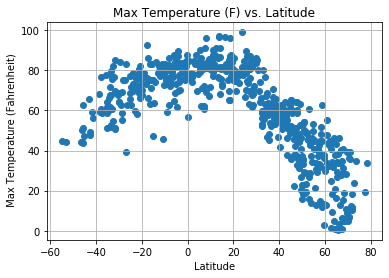

The code is pulling in the latitude as the x-axis (independent variable) and the maximum temperature as the y-axis (dependent variable), and it analyzing the relationship between them.
The maximum temperature of cities has a trend of decreasing as the distance from latitiude of 0 (the equator) increases.


In [12]:
# Build a scatter plot for each data type

#Temperature (F) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Maximum Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Max Temperature (F) vs. Latitude")
plt.ylabel(" Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("MaxTemperatureVsLatitudeScatter.png")

# Show plot
plt.show()

#After each plot add a sentence or too explaining what the code is and analyzing.
print(f"The code is pulling in the latitude as the x-axis (independent variable) and the maximum temperature as the y-axis (dependent variable), and it analyzing the relationship between them.")
print(f"The maximum temperature of cities has a trend of decreasing as the distance from latitiude of 0 (the equator) increases.")

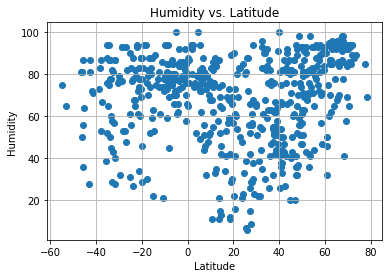

The code is pulling in the latitude as the x-axis (independent variable) and the humidity as the y-axis (dependent variable), and it analyzing the relationship between them.
The humidity of cities does not have a discernible trend in relation to latitude.


In [13]:
# Humidity (%) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityVsLatitudeScatter.png")

# Show plot
plt.show()

#After each plot add a sentence or too explaining what the code is and analyzing.
print(f"The code is pulling in the latitude as the x-axis (independent variable) and the humidity as the y-axis (dependent variable), and it analyzing the relationship between them.")
print(f"The humidity of cities does not have a discernible trend in relation to latitude.")

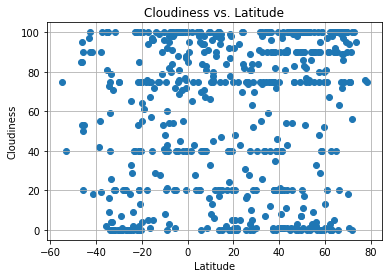

The code is pulling in the latitude as the x-axis (independent variable) and the cloudiness as the y-axis (dependent variable), and it analyzing the relationship between them.
The cloudiness of cities does not have a discernible trend in relation to latitude.


In [14]:
# Cloudiness (%) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessVsLatitudeScatter.png")

# Show plot
plt.show()

#After each plot add a sentence or too explaining what the code is and analyzing.
print(f"The code is pulling in the latitude as the x-axis (independent variable) and the cloudiness as the y-axis (dependent variable), and it analyzing the relationship between them.")
print(f"The cloudiness of cities does not have a discernible trend in relation to latitude.")

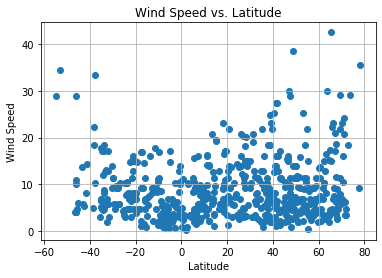

The code is pulling in the latitude as the x-axis (independent variable) and the wind speed as the y-axis (dependent variable), and it analyzing the relationship between them.
The wind speed of cities does not have a discernible trend in relation to latitude.


In [15]:
# Wind Speed (mph) vs. Latitude

plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedVsLatitudeScatter.png")

# Show plot
plt.show()

#After each plot add a sentence or too explaining what the code is and analyzing.
print(f"The code is pulling in the latitude as the x-axis (independent variable) and the wind speed as the y-axis (dependent variable), and it analyzing the relationship between them.")
print(f"The wind speed of cities does not have a discernible trend in relation to latitude.")

In [16]:
#The next sections runs linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

#This splits the data between nothern and southern hemispheres and does not include data on the equator
northern_weather_data = weather_data[weather_data["Latitude"]>0]
southern_weather_data = weather_data[weather_data["Latitude"]<0]

In [17]:
#This method sets up the linear regression charts and saves a PNG of each
def linear_regression(col_x, col_y, title):

    # This performs a linear regression on the two columns
    t_slope, t_intercept, t_r, t_p, t_std_err = linregress(col_x,col_y)

    # Create equation of line to calculate from linear regression
    t_fit = t_slope * col_x + t_intercept

    #Makes scatterplot
    plt.scatter(col_x,col_y)
    
    #Makes Regression Line
    plt.suptitle(title, fontsize=16, fontweight="bold")
    plt.plot(col_x, t_fit, "--",color="red")
    plt.xlabel(col_x.name)
    plt.ylabel(col_y.name)
    plt.show()
    
    #prints r-squared value
    print(f"The r-squared for the chart above is: {t_r*t_r}")
    
    shortened_title = title.replace(" ", "")
    # Save the figure
    plt.savefig(f"{shortened_title}.png")

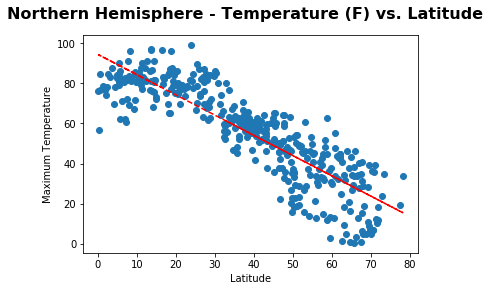

The r-squared for the chart above is: 0.7511883978837374


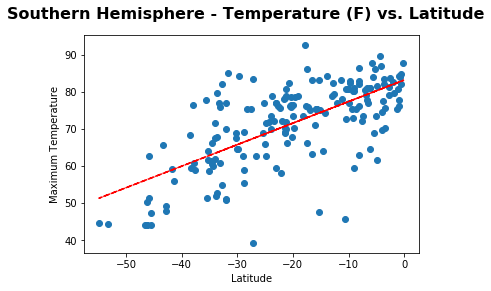

The r-squared for the chart above is: 0.45670320033712186


<Figure size 432x288 with 0 Axes>

In [18]:
linear_regression(northern_weather_data["Latitude"], northern_weather_data["Maximum Temperature"], "Northern Hemisphere - Temperature (F) vs. Latitude")
linear_regression(southern_weather_data["Latitude"], southern_weather_data["Maximum Temperature"], "Southern Hemisphere - Temperature (F) vs. Latitude")

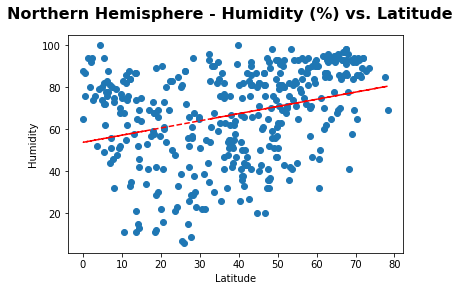

The r-squared for the chart above is: 0.0946651387084239


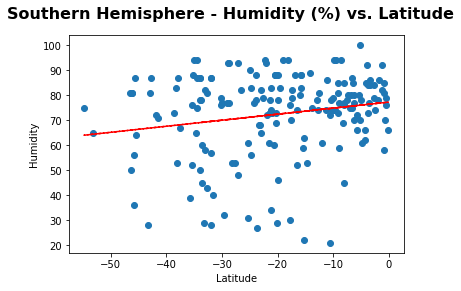

The r-squared for the chart above is: 0.03603779197150478


<Figure size 432x288 with 0 Axes>

In [19]:
linear_regression(northern_weather_data["Latitude"], northern_weather_data["Humidity"], "Northern Hemisphere - Humidity (%) vs. Latitude")
linear_regression(southern_weather_data["Latitude"], southern_weather_data["Humidity"], "Southern Hemisphere - Humidity (%) vs. Latitude")

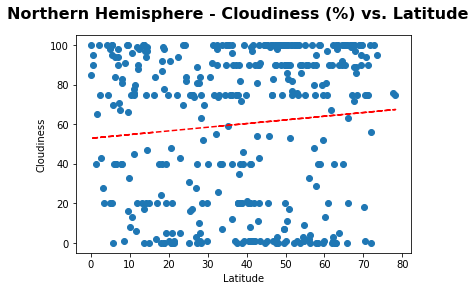

The r-squared for the chart above is: 0.009730388464677973


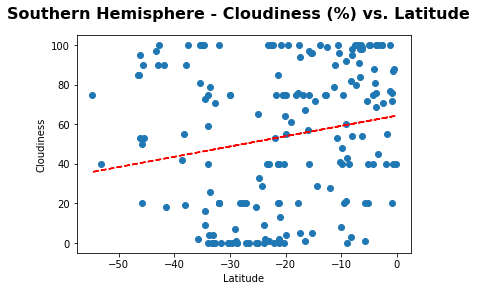

The r-squared for the chart above is: 0.03600192258663603


<Figure size 432x288 with 0 Axes>

In [20]:
linear_regression(northern_weather_data["Latitude"], northern_weather_data["Cloudiness"], "Northern Hemisphere - Cloudiness (%) vs. Latitude")
linear_regression(southern_weather_data["Latitude"], southern_weather_data["Cloudiness"], "Southern Hemisphere - Cloudiness (%) vs. Latitude")

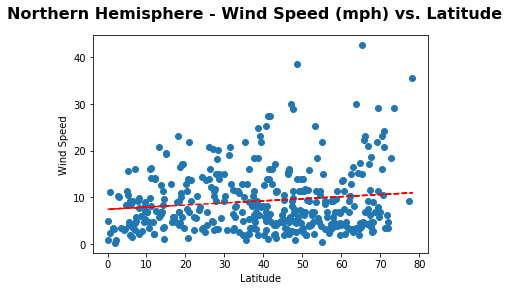

The r-squared for the chart above is: 0.018456220002849133


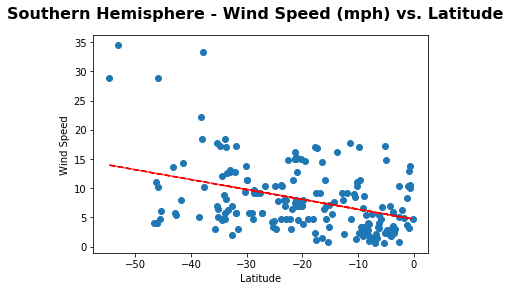

The r-squared for the chart above is: 0.1460350115077225


<Figure size 432x288 with 0 Axes>

In [21]:
linear_regression(northern_weather_data["Latitude"], northern_weather_data["Wind Speed"], "Northern Hemisphere - Wind Speed (mph) vs. Latitude")
linear_regression(southern_weather_data["Latitude"], southern_weather_data["Wind Speed"], "Southern Hemisphere - Wind Speed (mph) vs. Latitude")

Please see top for analysis section